# Domain Discretization in CONFLUENCE

## Introduction

Domain discretization is a crucial step in processed based hydrological modeling, where we divide our study area into smaller, more geophysically representative units. In CONFLUENCE, this process involves creating Hydrologic Response Units (HRUs) based on various geospatial characteristics. This notebook will guide you through the different discretization methods available in CONFLUENCE.

## Setup

First, let's set up our environment and import the necessary modules:

In [35]:
import sys
from pathlib import Path

# Add the parent directory to sys.path
current_dir = Path.cwd()
parent_dir = current_dir.parent.parent
sys.path.append(str(parent_dir))

import yaml
from utils.geospatial_utils.discretization_utils import DomainDiscretizer # type: ignore
import logging

# Load configuration
config_path = parent_dir / '0_config_files' / 'config_active.yaml'
with open(config_path, 'r') as config_file:
    config = yaml.safe_load(config_file)

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Initialize DomainDiscretizer
discretizer = DomainDiscretizer(config, logger)


## Key Configuration Settings

Before we proceed with discretization, let's review the key configuration settings:

- DOMAIN_DISCRETIZATION: Specifies the discretization method (e.g., 'GRUs', 'elevation', 'soilclass', 'landclass', 'radiation', 'combined')
- ELEVATION_BAND_SIZE: Size of elevation bands (for elevation-based discretization)
- MIN_HRU_SIZE: Minimum size of HRUs in km² (for merging small HRUs)
- RADIATION_CLASS_NUMBER: Number of radiation classes (for radiation-based discretization)
- CATCHMENT_SHP_HRUID: Column name for HRU ID in the catchment shapefile
- CATCHMENT_SHP_GRUID: Column name for GRU ID in the catchment shapefile

Ensure these settings are correctly defined in your config_active.yaml file.

## Discretization Methods

CONFLUENCE supports several discretization methods. Let's explore each of them:

## 1. Using GRUs as HRUs

This method uses Grouped Response Units (GRUs) as Hydrologic Response Units (HRUs) without further discretization.

To use this method, set in config:

- DOMAIN_DISCRETIZATION: GRUs

In [36]:
def use_grus_as_hrus():
    hru_shapefile = discretizer._use_grus_as_hrus()
    if hru_shapefile:
        logger.info(f"GRUs used as HRUs. Shapefile created at: {hru_shapefile}")
    else:
        logger.error("Failed to create HRUs from GRUs")

## 2. Elevation-based Discretization

This method creates HRUs based on elevation bands. Currently this is the only subdiscretization that seems to work for glaciers.

To use this method, set in config:

- DOMAIN_DISCRETIZATION: elevation
- ELEVATION_BAND_SIZE: 100 #example value in meters

In [37]:
def discretize_by_elevation():
    hru_shapefile = discretizer._discretize_by_elevation()
    if hru_shapefile:
        logger.info(f"Elevation-based HRUs created. Shapefile at: {hru_shapefile}")
    else:
        logger.error("Failed to create elevation-based HRUs")

## 3. Soil Class-based Discretization
This method creates HRUs based on soil classifications.

To use this method, set in config: 
- 'DOMAIN_DISCRETIZATION: soilclass

In [38]:
def discretize_by_soil_class():
    hru_shapefile = discretizer._discretize_by_soil_class()
    if hru_shapefile:
        logger.info(f"Soil class-based HRUs created. Shapefile at: {hru_shapefile}")
    else:
        logger.error("Failed to create soil class-based HRUs")

## 4. Land Class-based Discretization

This method creates HRUs based on land cover classifications.

To use this method, set in config: 

- DOMAIN_DISCRETIZATION: landclass

In [39]:
def discretize_by_land_class():
    hru_shapefile = discretizer._discretize_by_land_class()
    if hru_shapefile:
        logger.info(f"Land class-based HRUs created. Shapefile at: {hru_shapefile}")
    else:
        logger.error("Failed to create land class-based HRUs")

## 5. Radiation-based Discretization

This method creates HRUs based on radiation properties.

To use this method, set in config: 

- DOMAIN_DISCRETIZATION: radiation
- RADIATION_CLASS_NUMBER: 5  # Example value

In [40]:
def discretize_by_radiation():
    hru_shapefile = discretizer._discretize_by_radiation()
    if hru_shapefile:
        logger.info(f"Radiation-based HRUs created. Shapefile at: {hru_shapefile}")
    else:
        logger.error("Failed to create radiation-based HRUs")

## 6. Combined Discretization
### Note: Yet to be implemented as of 14/09/2024

This method creates HRUs based on a combination of geospatial attributes. 

- DOMAIN_DISCRETIZATION: combined
- COMBINED_DISCRETIZATION_METHODS: radiation, elevation #example combinations

In [41]:
def discretize_combined():
    hru_shapefile = discretizer._discretize_combined()
    if hru_shapefile:
        logger.info(f"Combined HRUs created. Shapefile at: {hru_shapefile}")
    else:
        logger.error("Failed to create combined HRUs")

Running the Discretization
Here's how you can run the domain discretization based on the configuration:

2025-03-13 22:28:49,194 - INFO - Starting domain discretization using method: radiation
2025-03-13 22:28:49,194 - INFO - Step 1/2: Running discretization method
2025-03-13 22:28:49,195 - INFO - Annual radiation raster not found. Calculating radiation...
2025-03-13 22:28:49,195 - INFO - Calculating annual radiation from DEM: /Users/amedin/Research/Confluence/CONFLUENCE_data/domain_Wolverine/attributes/elevation/dem/domain_Wolverine_elv.tif
2025-03-13 22:28:49,228 - INFO - Calculating radiation for each pixel...
2025-03-13 22:29:10,316 - INFO - Radiation raster saved to: /Users/amedin/Research/Confluence/CONFLUENCE_data/domain_Wolverine/attributes/radiation/annual_radiation.tif
2025-03-13 22:29:10,322 - INFO - Processing 1 GRUs using 10 cores
2025-03-13 22:29:15,715 - INFO - Processed 1/1 GRUs (100.0%)
2025-03-13 22:29:15,892 - INFO - Created 5751 HRUs from 1 GRUs
2025-03-13 22:29:16,064 - INFO - Starting HRU merging process (minimum size: 4.0 km²)
2025-03-13 22:29:16,759 - ERROR - Error

KeyError: 'avg_radiation'

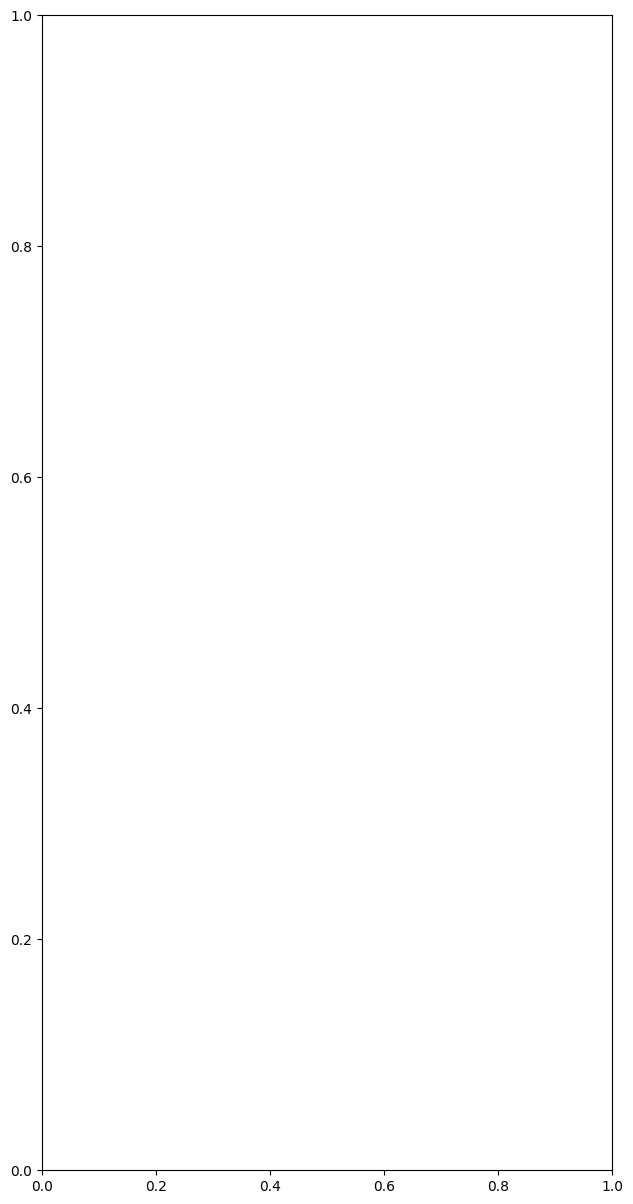

In [42]:
# Run the domain discretization
discretizer.discretize_domain()


## Post-discretization Steps
After discretization, CONFLUENCE performs some additional steps:

1. Merging small HRUs: HRUs smaller than MIN_HRU_SIZE are merged with neighboring HRUs.
2. Cleaning and preparing HRU data: This includes calculating mean elevation, ensuring valid geometries, and preparing data for SUMMA.

These steps are handled automatically by the DomainDiscretizer class.

## Conclusion

We've explored the various methods for domain discretization in CONFLUENCE, including using GRUs as HRUs, and discretization based on elevation, soil class, land class, radiation, and combined attributes. Each method offers different advantages depending on your modeling needs and data availability.

Remember to set the appropriate discretization method and related parameters in your configuration file before running the discretization process. In the next notebook, we'll look at how to use our discretised domain files for hydrological modelling.